<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter5_3_Introduction_to_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Natural Language Processing 🌐🗣️  

Tụi mình sẽ tìm hiểu về chủ đề **NLP** (xử lý ngôn ngữ tự nhiên) - một trong những nhánh thú vị của trí tuệ nhân tạo nha. 🤖✨  

![Introduce image](https://bobcares.com/wp-content/uploads/2024/11/Natural-Language-Processing.png)


# Working with Real Data Sources (Làm việc với các nguồn dữ liệu thực tế) 📊🌍  


## IMDB_reviews Dataset

Tụi mình sẽ sử dụng **TFDS** đã học ở **chương 4** để tải dữ liệu nha. 📦  

Bộ dữ liệu lần này tụi mình dùng là **imdb_reviews**, gồm 50.000 bình luận đánh giá phim, được gắn nhãn là tích cực hoặc tiêu cực nha. 🎥👍👎  


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

Tụi mình sẽ tiến hành lặp qua bộ dữ liệu và thêm phần văn bản bình luận vào một danh sách để dễ xử lý nha. 📝  

Tụi mình sử dụng **tfds.as_numpy** để đảm bảo rằng dữ liệu trả về sẽ ở dạng **string** chứ không phải **tensor**. 🔧  


In [ ]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split='train'))

In [ ]:
# Kiểm tra dữ liệu của mẫu (item) đầu tiên bên trong bộ dữ liệu
item_1st = next(iter(train_data))
print(item_1st)
print(type(item_1st))

Vậy là mỗi mẫu (item) được lưu với dạng một **dictionary** với 2 khóa là **'text' và 'label'**

In [ ]:
imdb_sentences = []
# Tiến hành lặp qua từng mẫu (item) để trích xuất văn bản ra lưu vào danh sách imdb_sentences
for item in train_data:
  imdb_sentences.append(str(item['text']))

In [ ]:
# Xem thử 5 bình luận đánh giá phim đầu tiên
for idx, comment in enumerate(imdb_sentences[:5]):
  print(f"Bình luận {idx+1}: {comment}")
  print("-"*100)

Bây giờ tụi mình tiến hành tạo bộ mã hóa cho bộ dữ liệu nha.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Khởi tạo bộ mã hóa
tokenizer = Tokenizer(num_words=5000)
# Tiến hành đưa dữ liệu vào bộ mã hóa, tạo từ điển
tokenizer.fit_on_texts(imdb_sentences)
# Tiến hành mã hóa các bình luận
sequences = tokenizer.texts_to_sequences(imdb_sentences)

Vậy là tụi mình đã tiến hành mã hóa thành công, bây giờ sẽ xem thử 5 bình luận đầu tiên đã được mã hóa như thế nào nhá

In [ ]:
for idx, seq in enumerate(sequences[:5]):
  print(f"Bình luận {idx+1}: {seq}")
  print("-"*100)

Hiển thị từ điển của bộ mã hóa

In [ ]:
word_index = tokenizer.word_index
print(word_index)

> **Mọi người đã nhận ra điểm bất hợp lý chưa @_@!** 🤔  

Đúng rồi đó, các từ như **"and, a, of, to, is"** đều là các **từ dừng (stopwords)**. Ngoài ra, còn xuất hiện cả các **thẻ HTML** như **br**. 🛑  

Vậy là chúng ta đã quên mất phần tiền xử lý dữ liệu, làm sạch văn bản trước khi đưa vào mã hóa. 🧹  

Workflow đúng của chúng ta sẽ như sau:  


```
Chuyển thành chữ thường --> Loại bỏ các thẻ HTML --> Loại bỏ kí tự đặc biệt --> Loại bỏ từ dừng --> Mã hóa dữ liệu
```



In [ ]:
# Tải danh sách từ dừng
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

from bs4 import BeautifulSoup
import string

table = str.maketrans('', '', string.punctuation)

# Tải bộ dữ liệu vào danh sách bình luận
imdb_sentences = []
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split='train'))
for item in train_data:
  sentence = str(item['text'].decode('UTF-8').lower()) # Tiến hành chuyển sang dạng UTF-8 và dạng chữ thường
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text() # Loại bỏ các thẻ HTML
  words = sentence.split()
  filtered_sentence = ""
  for word in words:
    word = word.translate(table) # Loại bỏ kí tự đặc biệt
    if word not in stopwords: # Loại bỏ từ dừng
      filtered_sentence = filtered_sentence + word + " "
  imdb_sentences.append(filtered_sentence)

# Sau khi tiến hành làm sạch dữ liệu, chúng ta sẽ tiến hành mã hóa
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(imdb_sentences)
sequences = tokenizer.texts_to_sequences(imdb_sentences)  # Mã hóa dữ liệu

In [ ]:
# In ra bộ từ điển
word_index = tokenizer.word_index
print(word_index)

In [ ]:
# Kiểm tra bộ từ điển có chứa stopwords không
flag = False
for key, value in word_index.items():
  if key in stopwords:
    flag = True
    print(f"{key}: {value}")

if flag == False:
  print("Không có từ dừng trong bộ từ điển")
else:
  print("Có từ dừng trong bộ từ điển")

Vậy là chúng ta đã làm sạch dữ liệu thành công và tạo bộ từ điển. 🎉  

Hè hè, tuy nhiên nó vẫn chưa thật sự hoàn hảo đâu. ⚠️  

Tụi mình cùng kiểm tra lại với danh sách các ký tự đặc biệt nha. 🔍  


In [ ]:
print("Danh sách kí tự đặc biệt: ", string.punctuation)

Tuy chúng ta đã loại bỏ được các ký tự đặc biệt, nhưng vẫn còn những trường hợp ngoại lệ. ⚠️  

**Ví dụ**: Các từ có ký tự đặc biệt nối liền ở giữa:  
- **"time-consuming"**: Khi loại bỏ ký tự đặc biệt, nó sẽ trở thành **timeconsuming**, điều này khiến từ vựng trở nên vô nghĩa.  
- **"him/her"**: Tương tự như trường hợp ở trên.  

Do đó, chúng ta cần xử lý thêm cả các trường hợp này. 🔧  

Ta sẽ tiến hành tách các ký tự đặc biệt ra, để chúng cách với các từ thay vì dính sát lại.  
Mình sẽ làm code ví dụ. 💻  


In [ ]:
example_sentences = [
    "It's very time-consuming",
    "Type your gender: he/her"
]

# Tiến hành xử lý trung gian các kí tự đặc biệt
normalize_sentences = []
for sentence in example_sentences:
  sentence = sentence.replace("/", " / ") # Đã thêm khoảng trắng vô 2 bên kí tự đặc biệt
  sentence = sentence.replace("'", " ' ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace(".", " . ")
  normalize_sentences.append(sentence)
print(normalize_sentences)

Và đây là kết quả. ✅  

Thông qua việc thêm phần xử lý trung gian này, khi loại bỏ các ký tự đặc biệt, ta có thể đảm bảo rằng các từ sẽ không bị dính liền với nhau. ✨  

Bước này sẽ được đặt trước bước xóa ký tự đặc biệt nha. 🔧  


## Bây giờ tụi mình sẽ đến với phần giải mã nha. 🔄  

> **Giải mã là gì?**  

Mọi người hiểu đơn giản là chúng ta sẽ chuyển ngược lại từ dạng số sang dạng chữ nha. 📝  
Ta sẽ thực hiện việc này dựa trên bộ từ điển mã hóa đã được tạo ra trước đó.  

Chúng ta vẫn sẽ sử dụng bộ mã hóa đã khởi tạo trước đó nha.  

**Đầu tiên**, ta cần đảo ngược lại bộ từ điển mã hóa, tức là các key và value sẽ hoán đổi vị trí cho nhau. 🔁  



```python
encoder_dict = {
  "i": 1,
  "love": 2,
  "you": 3,
  "all": 4,
  "the": 5,
  "time" 6,
  "have" 7
}
# Chuyển sang decoder sẽ là
decoder_dict = {
  encoder_dict = {
  1: "i",
  2: "love",
  3: "you",
  4: "all",
  5: "the",
  6: "time",
  7: "have"
}
}
```

Dưới đây là code ví dụ cách chuyển nha.

In [ ]:
# Tiến hành lấy bộ từ điển mã hóa
words_index = tokenizer.word_index
print("Bộ từ điển mã hóa: ", words_index)

In [ ]:
# Tiến hành tạo bộ giải mã
reverse_word_index = dict([(value, key) for (key, value) in words_index.items()]) # Lấy từng cặp key-value trong bộ mã hóa ra và hoán đổi ngược lai
print("Bộ từ điển giải mã: ", reverse_word_index)

In [ ]:
# Tiến hành giải mã lại bình luận đầu tiên
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in sequences[0]]) # Nếu gặp phải các số không có trong bộ giải mã, sẽ chuyển thành dấu ?

In [ ]:
imdb_sentences[0]

In [ ]:
# So sánh bình luận đầu tiên và bình luận sau khi giải mã lại
org_review = next(iter(train_data))['text']
print("Bình luận ban đầu: ", org_review)
print("Bình luận sau khi giải mã: ", decoded_review)

Như mọi người thấy, bình luận sau khi **giải mã** đã không còn các từ dừng như **"this, was, an"** trước đó nữa, nhờ vào việc **tiền xử lý, làm sạch dữ liệu** trước khi **mã hóa**. 🧹✨  

Để tiến hành **giải mã** toàn bộ dữ liệu, ta có thể sử dụng đoạn code dưới đây. 💻  


In [ ]:
decoded_reviews = []
for seq in sequences:
  decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in seq])
  decoded_reviews.append(decoded_review)

In [ ]:
# In ra 5 bình luận giải mã đầu tiên:
for decode_r in decoded_reviews[:5]:
  print("Bình luận 1: ", decode_r)
  print("-"*100)

## Using the IMDb Subwords Datasets 📚  

Tụi mình sẽ tìm hiểu về bộ dữ liệu **IMDb** đã được tiền xử lý sẵn và chia thành dạng danh sách từ, do chính **TFDS** cung cấp nha.  

Bởi vì đã được tiền xử lý sẵn và chia thành danh sách từ, bộ dữ liệu này đặc biệt hữu ích khi sử dụng như một bộ trung gian cho các tác vụ như:  
- **Mã hóa theo ký tự** (có mức tương quan ngữ nghĩa thấp). 🔤  
- **Mã hóa theo từ** (có mức tương quan ngữ nghĩa cao hơn). 📝  

Các cách tiếp cận này đặc biệt hiệu quả trong việc huấn luyện **mô hình phân loại ngôn ngữ**. 🧠  

Ngoài ra, bộ dữ liệu này cũng đã bao gồm cả phần **mã hóa (encoder) và giải mã (decoder)** để thuận tiện cho việc chia và mã hóa văn bản. 🔄  

Có 2 phần chính trong bộ dữ liệu là:  
- **Bộ dữ liệu 8k và 32k**  

Tụi mình sẽ quan sát cụ thể bộ dữ liệu 8k với các đoạn code dưới đây nha. 💻  

***(Lưu ý: Hiện tại, phiên bản 8k và 32k không được hỗ trợ và sử dụng nữa. Hiện tại chỉ còn bản thô ban đầu như chúng ta đã sử dụng ở trên, nó có tên là "plain_text").*** ⚠️  


Để kiểm chứng lại việc không còn hỗ trợ, mình sẽ thử in ra thông tin của bộ dữ liệu nha.

In [ ]:
import tensorflow_datasets as tfds
imdb_data, info = tfds.load('imdb_reviews',
                            with_info=True,
                            as_supervised=True)
print(info)

Như thông tin ở trên mà mình thấy thì đúng là vậy. Cụ thể là ở 2 dòng sau:  
> config_description="""
    Plain text
    """

> full_name='imdb_reviews/plain_text/1.0.0'

Hiện tại, phương thức mặc định chỉ còn trả về thư mục **plain_text**, và trong phần config không còn tồn tại **subwords8k hay 32k**. 🗂️  

Mọi người có thể xem rõ thông tin chi tiết [tại đây](https://discuss.ai.google.dev/t/failing-to-download-data-from-imdb-reviews-subwords8k-dataset-urgent-help-needed/32064) nha. 🔗  

Trong trường hợp mọi người vẫn muốn tìm hiểu, mình in ra đoạn code ở đây nha.



```python
# Tải bộ dữ liệu
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                        split = (tfds.Split.TRAIN, tfds.Split.TEST),
                                        as_supervised=True,
                                        with_info=True)
# Lấy phần encoder ra
encoder = info.features['text'].encoder
# In ra các từ bên trong encoder
print(encoder.subwords)
# Output: ['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_',...]

# Mọi người có thể thấy nó bao gồm cả các từ dừng và thẻ HTML
# Tiến hành mã hóa
sample_string = 'Today is a sunny day'
encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))
# Output: Encoded string is [6427, 4869, 9, 4, 2365, 1361, 606]
# Ở đây có một điểm đặc biệt là câu của chúng ta có 5 từ nhưng lại được mã hóa với kết quả có độ dài tận 7
# Kiểm tra từ được mã hóa đầu tiên
print(encoder.subwords[6426])
# Output: Tod
# Tiến hành giải mã lại
original_string = encoder.decode(encoded_string)
test_string = encoder.decode([6427, 4869, 9, 4, 2365, 1361, 606])
```



## Getting Text from CSV Files 📄  

Bây giờ tụi mình sẽ làm việc với dữ liệu text lấy từ file CSV nha.  

Ở đây, tác giả nói đã sử dụng bộ dữ liệu từ kho dữ liệu **Twitter**, áp dụng trong open-source **Sentiment Analysis in Text dataset**. Tuy nhiên, lại không rõ về đường dẫn hay vị trí lấy cụ thể. 🤔  

Do đó, mình xin phép sử dụng một bộ dữ liệu tương tự để thay thế nha.  

Mọi người tải giúp mình bộ dữ liệu **tweet_emotions** [tại đây](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text?select=tweet_emotions.csv) nha. Sau đó, úp lên phần cửa sổ thư mục bên tay trái. 📥  


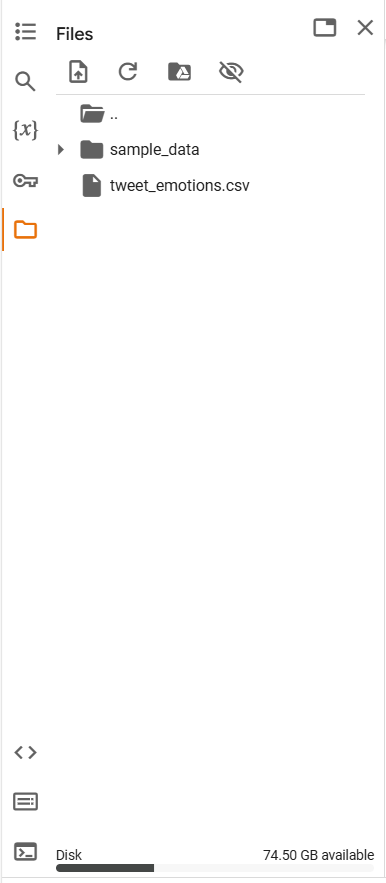

Truy cập vào đường dẫn về bộ dữ liệu trên, xuống phần phân tích dữ liệu, mọi người có thể thấy chúng bao gồm 3 cột lần lượt là **id, sentiment và content**. 📊  

Ở đây, mọi người có thể load nhanh file bằng **Pandas** cũng được nha. 🐼  
Hiện tại, mình thực hiện theo đúng nguyên tác của tác giả là dùng **reader**. 📖  


In [ ]:
import csv
rows = []
# Lưu các hàng của dữ liệu lại
with open("/content/tweet_emotions.csv", encoding="UTF-8") as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  for row in reader:
    rows.append(row)


In [ ]:
# Xem cấu trúc 5 hàng đầu tiên của file
for r in rows[:5]:
  print(r)

Vậy là dữ liệu mỗi hàng sẽ tương ứng với 3 cột theo thứ tự lần lượt là **id, sentiment và content**. 🗂️  
Hàng đầu tiên chính là tên các cột.  

Bây giờ, tụi mình chỉ việc lọc ra phần **văn bản nội dung** và **nhãn cảm xúc**, đồng thời thực hiện luôn phần **làm sạch văn bản** nha. 🧹  


In [ ]:
import nltk
from nltk.corpus import stopwords

# Chuẩn bị trước cho phần loại bỏ từ dừng
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# Chuẩn bị trước cho phần loại bỏ thẻ HTML
from bs4 import BeautifulSoup

# Chuẩn bị trước cho phần loại bỏ kí tự đặc biệt
import string
table = str.maketrans('', '', string.punctuation)

In [ ]:
sentences = []
labels = []
for r in rows[1:]: # Vì hàng đầu tiên là tên các cột nên chúng ta không lấy, tính từ vị trí index 1 nha
  labels.append(r[1])
  sentence = r[2].lower()
  # Tiến hành tiền xử lý các kí tự đặc biệt
  sentence = sentence.replace("/", " / ")
  sentence = sentence.replace("'", " ' ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace(".", " . ")
  # Tiến hành loại bỏ các thẻ HTML bằng BeautifulSoup
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  # Chia thanh danh sách các từ
  words = sentence.split()
  filtered_sentence = ""
  # Tiến hành loại bỏ kí tự đặc biệt và kiểm tra để loại bỏ các từ dừng
  for word in words:
    word = word.translate(table) # Loại bỏ kí tự đặc biệt
    if word not in stopwords: # Kiểm tra và loại bỏ từ dừng
      filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)

In [ ]:
# Kiểm tra 5 câu đầu tiên và nhãn của chúng
for i in range(5):
  print(f"Emotion: {labels[i]}")
  print(f"Sentence: {sentences[i]}")
  print("-"*100)

Bây giờ tụi mình sẽ tiến hành chia tập **huấn luyện** và **kiểm tra** cho bộ dữ liệu nha. 🔄  

Ở đây, mình không chỉ định cứng giống với tác giả vì bộ dữ liệu là khác nhau. Thay vào đó, mình sẽ sử dụng **train_test_split** trong **sklearn** cho nhanh nha. 🐍  

**Code gốc của tác giả** cho bạn nào cần:  

```python
training_size = 28000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Chia bộ dữ luyện huấn luyện và kiểm tra với test size là 20%
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.2)

In [ ]:
# Kiểm tra lại tập huấn luyện và kiểm tra:
print(f"Tổng số câu huấn luyện: {len(training_sentences)}")
print(f"Tổng số câu kiểm tra: {len(testing_sentences)}")

Bây giờ tụi mình sẽ tiến hành áp dụng hết kiến thức **mã hóa** đã học ở phần trước vào nha.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 20000 # Kích thước tối đa của từ điển
max_length = 10 # Số từ tối đa của chuỗi
trunc_type = 'post' # Phương thức cắt chuỗi là giữ lại các từ phía trước
padding_type = 'post' # Định nghĩa thêm phần đệm vào phía sau chuỗi
oov_tok = "<OOV>" # Token đại diện cho các từ không có trong từ điển

# Tạo bộ mã hóa
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Kiểm tra bộ từ điển mã hóa
print("Bộ từ điển mã hóa: ", tokenizer.word_index)

In [ ]:
# Tiến hành mã hóa tập huấn luyện
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Tiến hành đệm cho tập huấn luyện
training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

In [ ]:
# Xem kết quả tập huấn luyện sau khi đã mã hóa, ở đây mình chỉ kiểm tra trước 5 chuỗi đầu
for i in range(5):
  print(f"Encoded sequence {i+1}: {training_sequences[i]}")
  print(f"Padded sequence {i+1}: {training_padded[i]}")
  print("-"*100)

***(Lưu ý: Vì ở đây kích thước chuỗi tối đa khá nhỏ nên không sao. Tuy nhiên, khi làm việc với các bộ dữ liệu rất lớn và kích thước tối đa có thể lên đến hàng trăm hoặc hàng ngàn, việc đệm hết một lần cả bộ dữ liệu này sẽ không hiệu quả.)*** ⚠️  

**Cách giải quyết**:  
Mọi người có thể tìm hiểu thử **phương pháp đệm động (dynamic padding)**. Thay vì đệm hết một lần cho toàn bộ dữ liệu, ta sẽ tiến hành chia dữ liệu thành các **lô (batch)**. Khi huấn luyện đến batch nào, sẽ tiến hành đệm cho các chuỗi trong batch đó dựa trên **chuỗi có độ dài nhất** trong batch. 🔄📏  


## Getting Text from JSON File 📄  

Bây giờ tụi mình sẽ cùng làm việc với dạng **file JSON** nha.  

Đây là định dạng file rất thường xuyên được sử dụng để trao đổi thông tin giữa các **website hoặc ứng dụng web**. 🌐  

Cấu trúc của chúng rất đơn giản, giống như một **dictionary** của Python hoặc **danh sách dictionary**, tuy nhiên chúng ta sẽ không gọi các phần tử đó là **dictionary** mà là **object**. 🧩  

Về cơ bản, thao tác cũng không khác gì nhau, nhưng chúng ta vẫn cần phân biệt rõ **object** và **dictionary** là 2 loại khác nhau. Mọi người có thể tự tìm hiểu thêm phần này nha. 📖  


Ví dự dữ liệu trong file json:
- Ở dạng một đối tượng:


```javascript
 {"firstName" : "Laurence",
 "lastName" : "Moroney"}
```

- Ở dạng một danh sách các đối tượng:


```javascript
[
 {"firstName" : "Laurence",
 "lastName" : "Moroney"},
 {"firstName" : "Sharon",
 "lastName" : "Agathon"}
 ]
```

Các thuộc tính của đối tượng (object) có thể là một danh sách hoặc một nhóm các thuộc tính khác nữa, lúc này thuộc tính đó lại giống như một object nhỏ hơn bên trong.



```javascript
[
 {"firstName" : "Laurence",
 "lastName" : "Moroney",
 "emails": ["lmoroney@gmail.com", "lmoroney@galactica.net"]
 },
 {"firstName" : "Sharon",
 "lastName" : "Agathon",
 "emails": ["sharon@galactica.net", "boomer@cylon.org"]
 }
 ]
```






Tụi mình sẽ sử dụng bộ dữ liệu [News Headlines Dataset For Sarcasm Detection](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection) để làm việc nha. 📰  

Bộ dữ liệu này được dùng để dự đoán xem các bài báo có phải là châm biếm hay không. 🤔  

Tương tự như làm việc với file CSV, chúng ta cũng sẽ tải dữ liệu về và úp lên cửa sổ thư mục bên trái trong **Colab**. 📥  


```markdown
Kiểm tra cấu trúc của các đối tượng trong phần mô tả bộ dữ liệu trên **Kaggle**, chúng ta sẽ thấy kết quả như sau:  

```python
"root":{3 items
"article_link":string"https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5"
"headline":string"former versace store clerk sues over secret 'black code' for minority shoppers"
"is_sarcastic":int0
}
```

Vậy là mỗi đối tượng hay mẫu trong file dữ liệu JSON sẽ có 3 thuộc tính:  
- **article_link**  
- **headline**  
- **is_sarcastic** 📰  
```


In [ ]:
import json
datastore = []
# Tiến hành load bộ dữ liệu trong file và lưu lại vào trong danh sách datastore
with open('/content/Sarcasm_Headlines_Dataset.json', 'r') as f:
  for line in f:
    datastore.append(json.loads(line))

In [ ]:
# Kiểm tra danh sách datastore:
print(f"Kích thước bộ dữ liệu: {len(datastore)} mẫu.")
for i in range(5):
  print(f"Mẫu {i+1}: {datastore[i]}")

Chúng ta sẽ tiến hành lặp qua từng đối tượng và lưu dữ liệu vào 3 danh sách đại diện cho 3 thuộc tính của đối tượng. 🔄  

Đồng thời, trong lúc đó, chúng ta cũng thực hiện luôn việc **làm sạch văn bản** nha. 🧹  


In [ ]:
sentences = [] # Đại diện cho headline
labels = [] # Đại diện cho is_sarcastic
urls = [] # Đại diện cho article_link

for item in datastore:
  sentence = item["headline"].lower()
  # Tiến hành tiền xử lý các kí tự đặc biệt
  sentence = sentence.replace("/", " / ")
  sentence = sentence.replace("'", " ' ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  # Loại bỏ các thẻ HTML
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  # Tiến hành lọc và xóa kí tự đặc biệt, loại bỏ các từ dừng
  filtered_sentence = ""
  words = sentence.split()
  for word in words:
    word = word.translate(table) # Xóa các kí tự đặc biệt
    if word not in stopwords: # Lọc các từ không phải từ dừng
      filtered_sentence = filtered_sentence + word + " "
  # Thêm vào đanh sách sentence, labels, và urls
  sentences.append(filtered_sentence)
  labels.append(item["is_sarcastic"])
  urls.append(item["article_link"])

Các công việc còn lại cũng tương tự như phần trên, bao gồm:  
- Chia tập **huấn luyện** và **kiểm tra**. 🔄  
- **Mã hóa** dữ liệu. 🔢  
- **Đệm** cho bộ dữ liệu. 📏  


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Chia bộ dữ luyện huấn luyện và kiểm tra với test size là 20%
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.2)

In [ ]:
# Kiểm tra lại tập huấn luyện và kiểm tra:
print(f"Tổng số câu huấn luyện: {len(training_sentences)}")
print(f"Tổng số câu kiểm tra: {len(testing_sentences)}")

In [ ]:
vocab_size = 20000 # Kích thước tối đa của từ điển
max_length = 10 # Số từ tối đa của chuỗi
trunc_type = 'post' # Phương thức cắt chuỗi là giữ lại các từ phía trước
padding_type = 'post' # Định nghĩa thêm phần đệm vào phía sau chuỗi
oov_tok = "<OOV>" # Token đại diện cho các từ không có trong từ điển

# Tạo bộ mã hóa
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Kiểm tra bộ từ điển mã hóa
print("Bộ từ điển mã hóa: ", tokenizer.word_index)

In [ ]:
# Tiến hành mã hóa tập huấn luyện
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Tiến hành đệm cho tập huấn luyện
training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

In [ ]:
# Xem kết quả tập huấn luyện sau khi đã mã hóa, ở đây mình chỉ kiểm tra trước 5 chuỗi đầu
for i in range(5):
  print(f"Encoded sequence {i+1}: {training_sequences[i]}")
  print(f"Padded sequence {i+1}: {training_padded[i]}")
  print("-"*100)

# Tổng kết: 🎉  

Vậy là tụi mình đã hoàn thành xong nội dung chương 5 rồi nha. Tóm tắt lại, nội dung chính xoay quanh việc **tiền xử lý, làm sạch dữ liệu văn bản** và **mã hóa chúng**. 🧹🔢  

**Kiến thức cần ôn tập**:  
- **Cách tải dữ liệu và làm việc với nhiều loại file**. 📂  
- **Các bước cơ bản để tiền xử lý văn bản**:  

```python
Chuyển sang dạng chữ thường --> Xử lý các ký tự đặc biệt --> Loại bỏ các thẻ HTML --> Xóa các ký tự đặc biệt --> Lọc, loại bỏ các từ dừng
```

- **Các phương pháp mã hóa văn bản**:  
  - Mã hóa ký tự. 🔤  
  - Mã hóa từ. 📝  
- **Bộ đệm cho các chuỗi**. 📏  
